In [1]:
import pandas as pd

# Define the directory where your folders are located
file_path_1 = ".\Telco_customer_churn_adapted_v2.csv"

telco_df = pd.read_csv(file_path_1)

telco_df

Customer ID  Tenure Months Location Device Class        Games Product  \
0               0              2  Jakarta      Mid End                  Yes   
1               1              2  Jakarta     High End                   No   
2               2              8  Jakarta     High End                   No   
3               3             28  Jakarta     High End                   No   
4               4             49  Jakarta     High End                   No   
...           ...            ...      ...          ...                  ...   
7038         7038             72  Jakarta      Low End  No internet service   
7039         7039             24  Jakarta      Mid End                  Yes   
7040         7040             72  Jakarta     High End                   No   
7041         7041             11  Jakarta      Mid End                  Yes   
7042         7042             66  Jakarta     High End                  Yes   

            Music Product    Education Product Call Center  \
0                     Yes                   No          No   
1                      No                   No          No   
2                      No                  Yes          No   
3                      No                  Yes         Yes   
4                     Yes                  Yes          No   
...                   ...                  ...         ...   
7038  No internet service  No internet service          No   
7039                   No                  Yes         Yes   
7040                  Yes                  Yes          No   
7041                   No                   No          No   
7042                   No                  Yes         Yes   

            Video Product            Use MyApp  Payment Method  \
0                      No                   No  Digital Wallet   
1                      No                   No           Pulsa   
2                     Yes                  Yes           Pulsa   
3                     Yes                  Yes           Pulsa   
4                     Yes                  Yes           Debit   
...                   ...                  ...             ...   
7038  No internet service  No internet service           Debit   
7039                  Yes                  Yes  Digital Wallet   
7040                  Yes                  Yes          Credit   
7041                   No                   No           Pulsa   
7042                  Yes                  Yes           Debit   

      Monthly Purchase (Thou. IDR) Churn Label  Longitude  Latitude  \
0                           70.005         Yes  106.81667      -6.2   
1                           91.910         Yes  106.81667      -6.2   
2                          129.545         Yes  106.81667      -6.2   
3                          136.240         Yes  106.81667      -6.2   
4                          134.810         Yes  106.81667      -6.2   
...                            ...         ...        ...       ...   
7038                        27.495          No  106.81667      -6.2   
7039                       110.240          No  106.81667      -6.2   
7040                       134.160          No  106.81667      -6.2   
7041                        38.480          No  106.81667      -6.2   
7042                       137.345          No  106.81667      -6.2   

      CLTV (Predicted Thou. IDR)  
0                         4210.7  
1                         3511.3  
2                         6983.6  
3                         6503.9  
4                         6942.0  
...                          ...  
7038                      6897.8  
7039                      2782.0  
7040                      7228.0  
7041                      3630.9  
7042                      6626.1  

[7043 rows x 16 columns]

In [2]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [3]:
telco_df['Estimation Total Purchase (Thou. IDR)'] = telco_df['Tenure Months'] * telco_df['Monthly Purchase (Thou. IDR)']
telco_df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)', 'Estimation Total Purchase (Thou. IDR)'],
      dtype='object')

In [4]:
telco_df['Payment Method'].value_counts()

Payment Method
Pulsa             2365
Digital Wallet    1612
Debit             1544
Credit            1522
Name: count, dtype: int64

In [5]:
telco_df.drop(columns=['Customer ID'], inplace=True)

In [6]:
telco_df.describe().T

count         mean          std  \
Tenure Months                          7043.0    32.371149    24.559481   
Monthly Purchase (Thou. IDR)           7043.0    84.190200    39.117061   
Longitude                              7043.0   107.043249     0.358314   
Latitude                               7043.0    -6.404182     0.322896   
CLTV (Predicted Thou. IDR)             7043.0  5720.384481  1537.974298   
Estimation Total Purchase (Thou. IDR)  7043.0  2963.455755  2944.148280   

                                              min         25%         50%  \
Tenure Months                             0.00000     9.00000    29.00000   
Monthly Purchase (Thou. IDR)             23.72500    46.15000    91.45500   
Longitude                               106.81667   106.81667   106.81667   
Latitude                                 -6.91474    -6.91474    -6.20000   
CLTV (Predicted Thou. IDR)             2603.90000  4509.70000  5885.10000   
Estimation Total Purchase (Thou. IDR)     0.00000   512.20000  1811.68000   

                                              75%          max  
Tenure Months                            55.00000     72.00000  
Monthly Purchase (Thou. IDR)            116.80500    154.37500  
Longitude                               107.60981    107.60981  
Latitude                                 -6.20000     -6.20000  
CLTV (Predicted Thou. IDR)             6994.65000   8450.00000  
Estimation Total Purchase (Thou. IDR)  4921.93000  11115.00000

## Calculate the Churn Rate

In [7]:
# Copy telco_df to telco_df_1
telco_df_1 = telco_df.copy()

In [8]:
# Assuming 'telco_df_1' is your DataFrame
telco_df_1['Churn Label'] = telco_df_1['Churn Label'].replace({'Yes': 1, 'No': 0})

# Print the modified DataFrame
telco_df_1.head()

Tenure Months Location Device Class Games Product Music Product  \
0              2  Jakarta      Mid End           Yes           Yes   
1              2  Jakarta     High End            No            No   
2              8  Jakarta     High End            No            No   
3             28  Jakarta     High End            No            No   
4             49  Jakarta     High End            No           Yes   

  Education Product Call Center Video Product Use MyApp  Payment Method  \
0                No          No            No        No  Digital Wallet   
1                No          No            No        No           Pulsa   
2               Yes          No           Yes       Yes           Pulsa   
3               Yes         Yes           Yes       Yes           Pulsa   
4               Yes          No           Yes       Yes           Debit   

   Monthly Purchase (Thou. IDR)  Churn Label  Longitude  Latitude  \
0                        70.005            1  106.81667      -6.2   
1                        91.910            1  106.81667      -6.2   
2                       129.545            1  106.81667      -6.2   
3                       136.240            1  106.81667      -6.2   
4                       134.810            1  106.81667      -6.2   

   CLTV (Predicted Thou. IDR)  Estimation Total Purchase (Thou. IDR)  
0                      4210.7                                 140.01  
1                      3511.3                                 183.82  
2                      6983.6                                1036.36  
3                      6503.9                                3814.72  
4                      6942.0                                6605.69

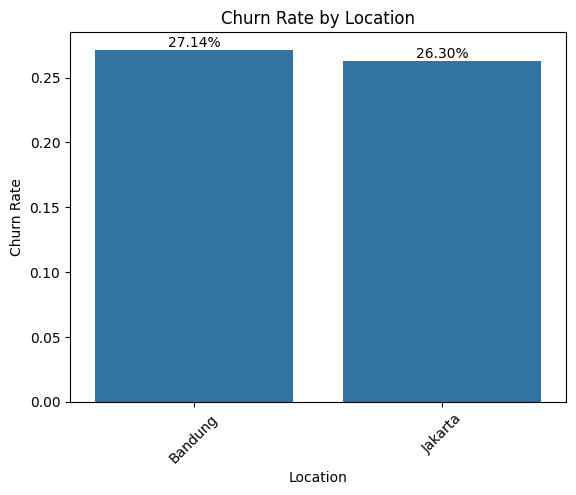

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn rate by location
churn_rate_by_location = telco_df_1.groupby('Location')['Churn Label'].mean().reset_index()

# Plot churn rate by location
# plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Churn Label', data=churn_rate_by_location)
plt.xticks(rotation=45)
plt.title('Churn Rate by Location')
plt.ylabel('Churn Rate')

# Add text labels
for index, value in enumerate(churn_rate_by_location['Churn Label']):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
    
plt.show()

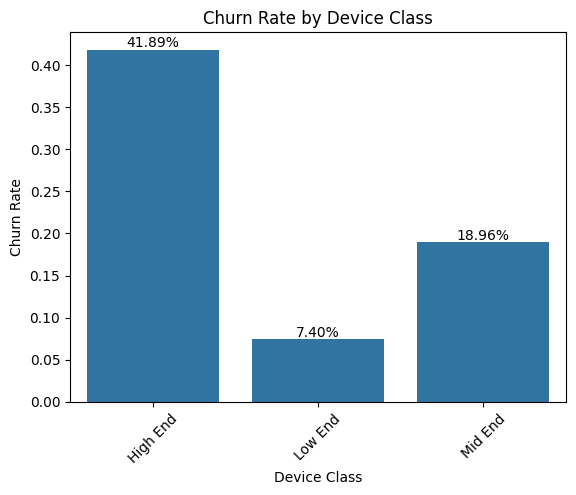

In [11]:
# Calculate churn rate by location
churn_rate_by_device = telco_df_1.groupby('Device Class')['Churn Label'].mean().reset_index()

# Plot churn rate by location
sns.barplot(x='Device Class', y='Churn Label', data=churn_rate_by_device)
plt.xticks(rotation=45)
plt.title('Churn Rate by Device Class')
plt.ylabel('Churn Rate')

# Add text labels
for index, value in enumerate(churn_rate_by_device['Churn Label']):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
    
plt.show()

In [12]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_df_1['Tenure Group'] = pd.cut(telco_df_1['Tenure Months'], range(1, 80, 12), right=False, labels=labels)
telco_df_1.drop(columns=['Tenure Months'], inplace=True)

C:\Users\miran\AppData\Local\Temp\ipykernel_22172\1461933936.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_tenuregroup = telco_df_1.groupby('Tenure Group')['Churn Label'].mean().reset_index()


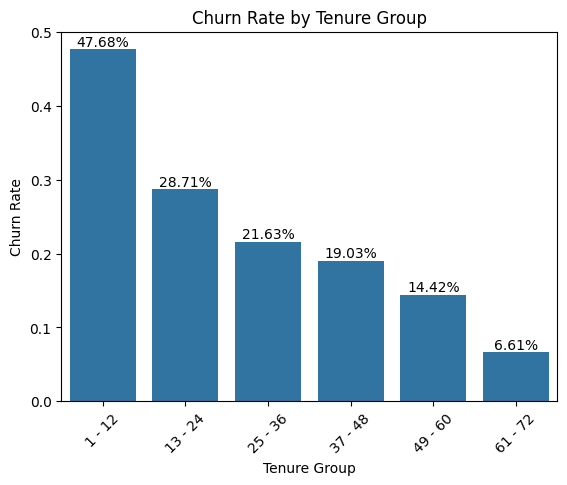

In [14]:
# Calculate churn rate by location
churn_rate_by_tenuregroup = telco_df_1.groupby('Tenure Group')['Churn Label'].mean().reset_index()

# Plot churn rate by location
sns.barplot(x='Tenure Group', y='Churn Label', data=churn_rate_by_tenuregroup)
plt.xticks(rotation=45)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')

# Add text labels
for index, value in enumerate(churn_rate_by_tenuregroup['Churn Label']):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
    
plt.show()

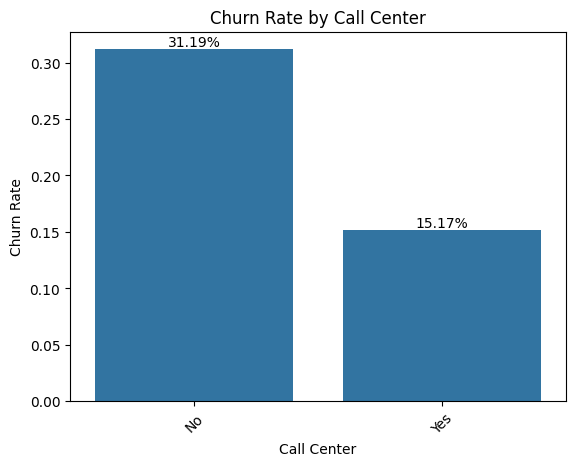

In [15]:
# Calculate churn rate by location
churn_rate_by_callcenter = telco_df_1.groupby('Call Center')['Churn Label'].mean().reset_index()

# Plot churn rate by location
# plt.figure(figsize=(12, 6))
sns.barplot(x='Call Center', y='Churn Label', data=churn_rate_by_callcenter)
plt.xticks(rotation=45)
plt.title('Churn Rate by Call Center')
plt.ylabel('Churn Rate')

# Add text labels
for index, value in enumerate(churn_rate_by_callcenter['Churn Label']):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')
    
plt.show()

Dari grafik di atas, kami mendapatkan informasi sebagai berikut:
- **Kota Bandung** memiliki churn rate yang lebih **tinggi** dibandingkan kota Jakarta sebesar **0.84%**.
- Customer dengan **device High-End** memiliki churn rate yang **paling tinggi**, sebesar **41.89%** dibanding device yang lain. Sedangkan **customer dengan churn rate paling rendah** terdapat pada **device Low-End** sebesar **7.40%**.
- Customer yang berada dalam grup **Tenure Months 1-12 bulan** memiliki churn rate paling tinggi sebesar **47.68%**. Sedangkan yang paling rendah terdapat pada **Tenure Months 61-72 bulan** sebesar **6.61%**.
- **Customer yang pernah menghubungi call center memiliki churn rate yang lebih rendah**, sebesar **15.17%**, dibandingkan yang **tidak menghubungi Call Center** (churn rate **31.19%**). Bisa jadi, layanan Call Center **memuaskan bagi pelanggan**, sehingga mereka tetap menggunakan layanan telekomunikasi perusahaan.

## Binning the Tenure Months

In [99]:
telco_df.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'Churn Label', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)',
       'Estimation Total Purchase (Thou. IDR)'],
      dtype='object')

In [100]:
telco_df.head(5)

Tenure Months Location Device Class Games Product Music Product  \
0              2  Jakarta      Mid End           Yes           Yes   
1              2  Jakarta     High End            No            No   
2              8  Jakarta     High End            No            No   
3             28  Jakarta     High End            No            No   
4             49  Jakarta     High End            No           Yes   

  Education Product Call Center Video Product Use MyApp  Payment Method  \
0                No          No            No        No  Digital Wallet   
1                No          No            No        No           Pulsa   
2               Yes          No           Yes       Yes           Pulsa   
3               Yes         Yes           Yes       Yes           Pulsa   
4               Yes          No           Yes       Yes           Debit   

   Monthly Purchase (Thou. IDR) Churn Label  Longitude  Latitude  \
0                        70.005         Yes  106.81667      -6.2   
1                        91.910         Yes  106.81667      -6.2   
2                       129.545         Yes  106.81667      -6.2   
3                       136.240         Yes  106.81667      -6.2   
4                       134.810         Yes  106.81667      -6.2   

   CLTV (Predicted Thou. IDR)  Estimation Total Purchase (Thou. IDR)  
0                      4210.7                                 140.01  
1                      3511.3                                 183.82  
2                      6983.6                                1036.36  
3                      6503.9                                3814.72  
4                      6942.0                                6605.69

In [101]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_df['Tenure Group'] = pd.cut(telco_df['Tenure Months'], range(1, 80, 12), right=False, labels=labels)

In [102]:
telco_df['Tenure Group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure Group, dtype: int64

In [103]:
# Drop column Tenure Months
telco_df.drop(columns=['Tenure Months'], axis=1, inplace=True)

In [104]:
telco_df

Location Device Class        Games Product        Music Product  \
0     Jakarta      Mid End                  Yes                  Yes   
1     Jakarta     High End                   No                   No   
2     Jakarta     High End                   No                   No   
3     Jakarta     High End                   No                   No   
4     Jakarta     High End                   No                  Yes   
...       ...          ...                  ...                  ...   
7038  Jakarta      Low End  No internet service  No internet service   
7039  Jakarta      Mid End                  Yes                   No   
7040  Jakarta     High End                   No                  Yes   
7041  Jakarta      Mid End                  Yes                   No   
7042  Jakarta     High End                  Yes                   No   

        Education Product Call Center        Video Product  \
0                      No          No                   No   
1                      No          No                   No   
2                     Yes          No                  Yes   
3                     Yes         Yes                  Yes   
4                     Yes          No                  Yes   
...                   ...         ...                  ...   
7038  No internet service          No  No internet service   
7039                  Yes         Yes                  Yes   
7040                  Yes          No                  Yes   
7041                   No          No                   No   
7042                  Yes         Yes                  Yes   

                Use MyApp  Payment Method  Monthly Purchase (Thou. IDR)  \
0                      No  Digital Wallet                        70.005   
1                      No           Pulsa                        91.910   
2                     Yes           Pulsa                       129.545   
3                     Yes           Pulsa                       136.240   
4                     Yes           Debit                       134.810   
...                   ...             ...                           ...   
7038  No internet service           Debit                        27.495   
7039                  Yes  Digital Wallet                       110.240   
7040                  Yes          Credit                       134.160   
7041                   No           Pulsa                        38.480   
7042                  Yes           Debit                       137.345   

     Churn Label  Longitude  Latitude  CLTV (Predicted Thou. IDR)  \
0            Yes  106.81667      -6.2                      4210.7   
1            Yes  106.81667      -6.2                      3511.3   
2            Yes  106.81667      -6.2                      6983.6   
3            Yes  106.81667      -6.2                      6503.9   
4            Yes  106.81667      -6.2                      6942.0   
...          ...        ...       ...                         ...   
7038          No  106.81667      -6.2                      6897.8   
7039          No  106.81667      -6.2                      2782.0   
7040          No  106.81667      -6.2                      7228.0   
7041          No  106.81667      -6.2                      3630.9   
7042          No  106.81667      -6.2                      6626.1   

      Estimation Total Purchase (Thou. IDR) Tenure Group  
0                                    140.01       1 - 12  
1                                    183.82       1 - 12  
2                                   1036.36       1 - 12  
3                                   3814.72      25 - 36  
4                                   6605.69      49 - 60  
...                                     ...          ...  
7038                                1979.64      61 - 72  
7039                                2645.76      13 - 24  
7040                                9659.52      61 - 72  
7041                                 423.28       1 - 12  
7042            

## Exploring the Data

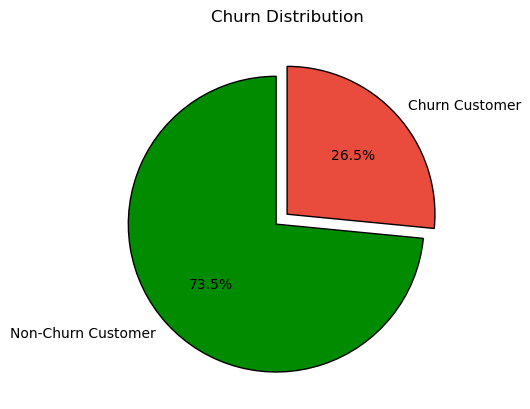

In [105]:
colors = ['#008B00','#E94B3C']
l = list(telco_df['Churn Label'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
plt.pie(circle,labels = ['Non-Churn Customer', 'Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn Distribution');

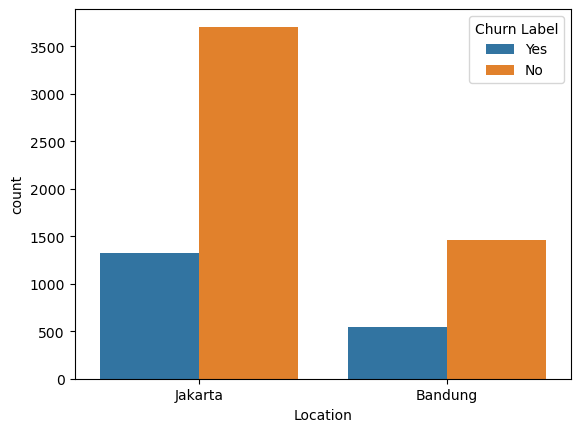

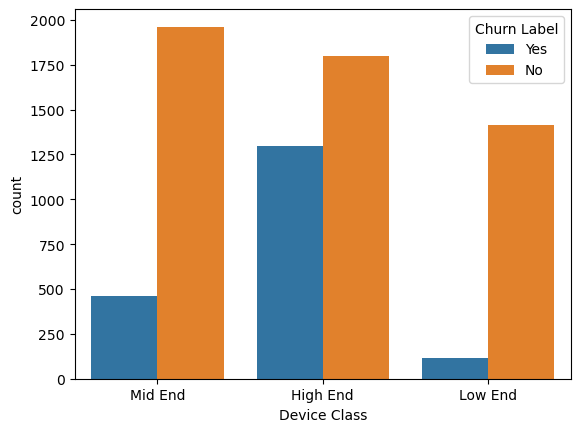

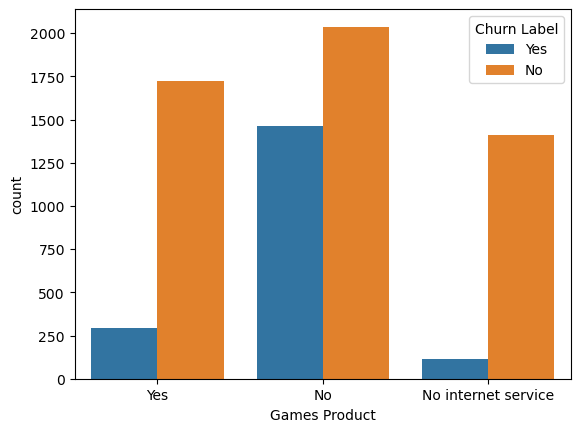

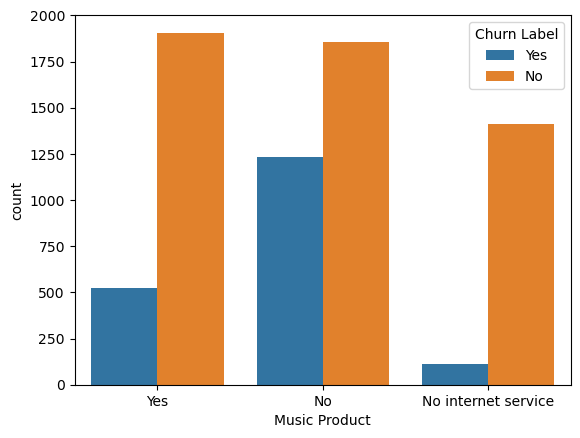

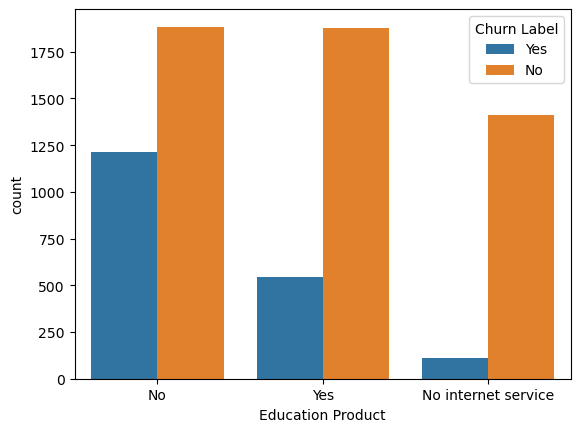

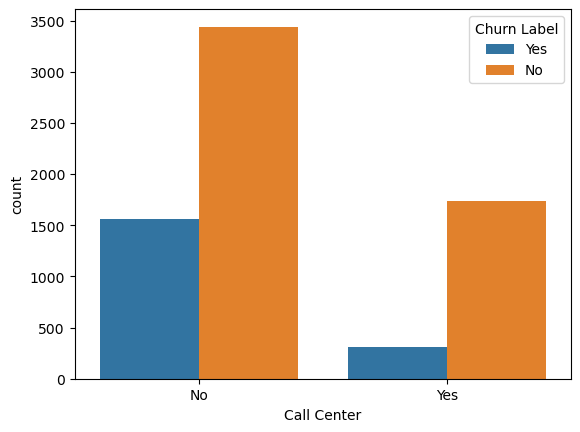

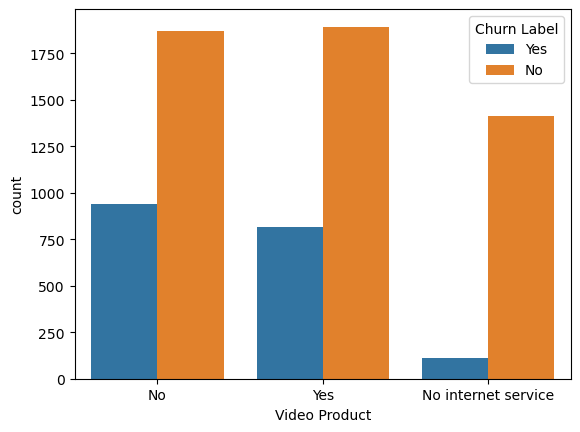

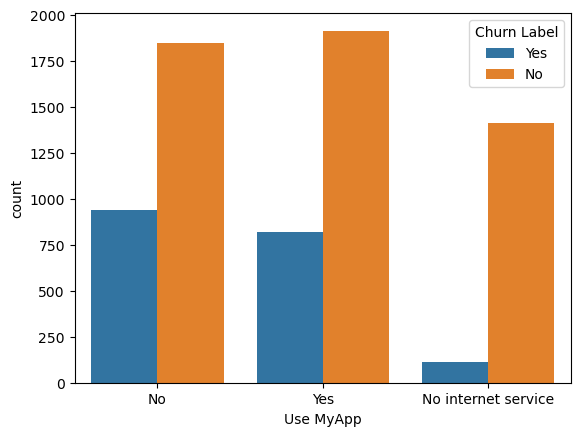

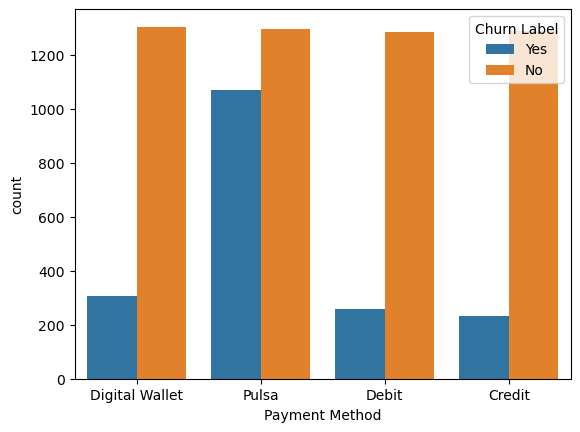

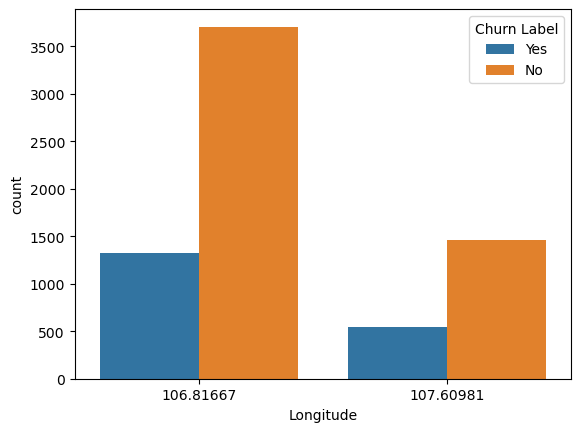

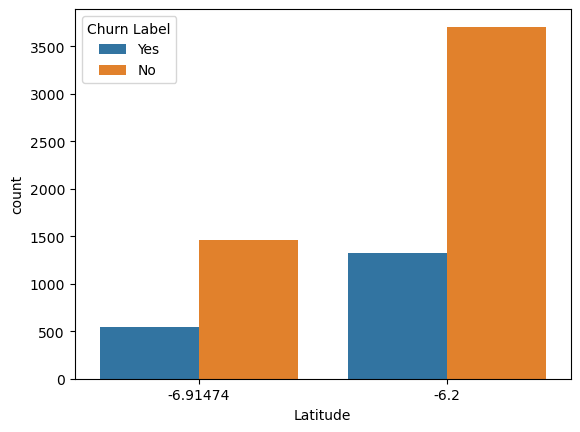

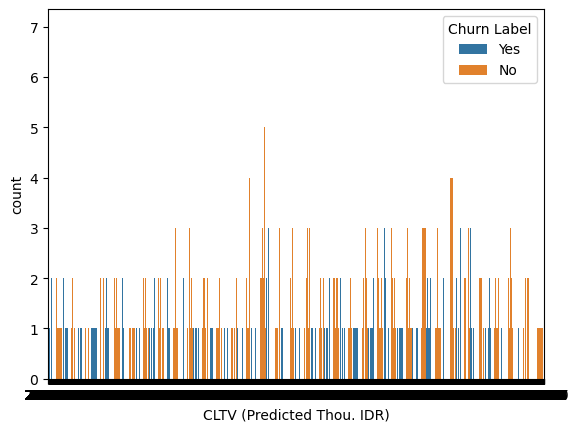

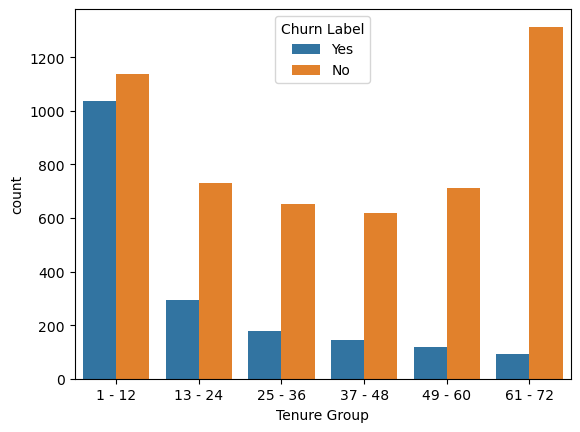

In [106]:
for i, predictor in enumerate(telco_df.drop(columns=['Churn Label', 'Estimation Total Purchase (Thou. IDR)', 'Monthly Purchase (Thou. IDR)'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='Churn Label')

Dari grafik di atas, kami mendapatkan informasi sebagai berikut:
- **Kota Bandung** memiliki kasus churn yang lebih **rendah** dibandingkan kota Jakarta. Akan tetapi, **kota Jakarta** memiliki **lebih banyak customer non-churn** dibandingkan kota Bandung. Meskipun begitu, kebanyakan customer dari kedua kota tersebut memiliki customer **aktif yang lebih banyak** dibandingkan yang churn.
- Customer dengan **device High-End** memiliki kasus churn yang **paling tinggi** dibanding device yang lain. Sedangkan **customer non-churn paling tinggi** terdapat pada **device Mid-End**.
- Customer **tidak menggunakan internet** untuk **produk Games** memiliki kasus churn yang **paling tinggi**, meskipun tetapi lebih banyak customer yang aktif.
- Customer **menggunakan internet** untuk **produk Musik** memiliki kasus jumlah Non-churn yang **paling tinggi**, meskipun kasus churn paling sedikit untuk **yang tidak ada jaringan internet**.
- **Customer yang pernah menghubungi call center memiliki kasus churn yang paling sedikit** dibandingkan yang tidak menghubungi Call Center. Bisa jadi, layanan Call Center **memuaskan bagi pelanggan**, sehingga mereka tetap menggunakan layanan telekomunikasi perusahaan.
- **Customer yang menggunakan Pulsa** sebagai cara pembayaran memiliki kasus churn yang paling tinggi.
- **Customer yang masih berada dalam tenure group 1-12 bulan pertama** memiliki kasus churn yang paling tinggi.

C:\Users\miran\anaconda3\envs\bismillah\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

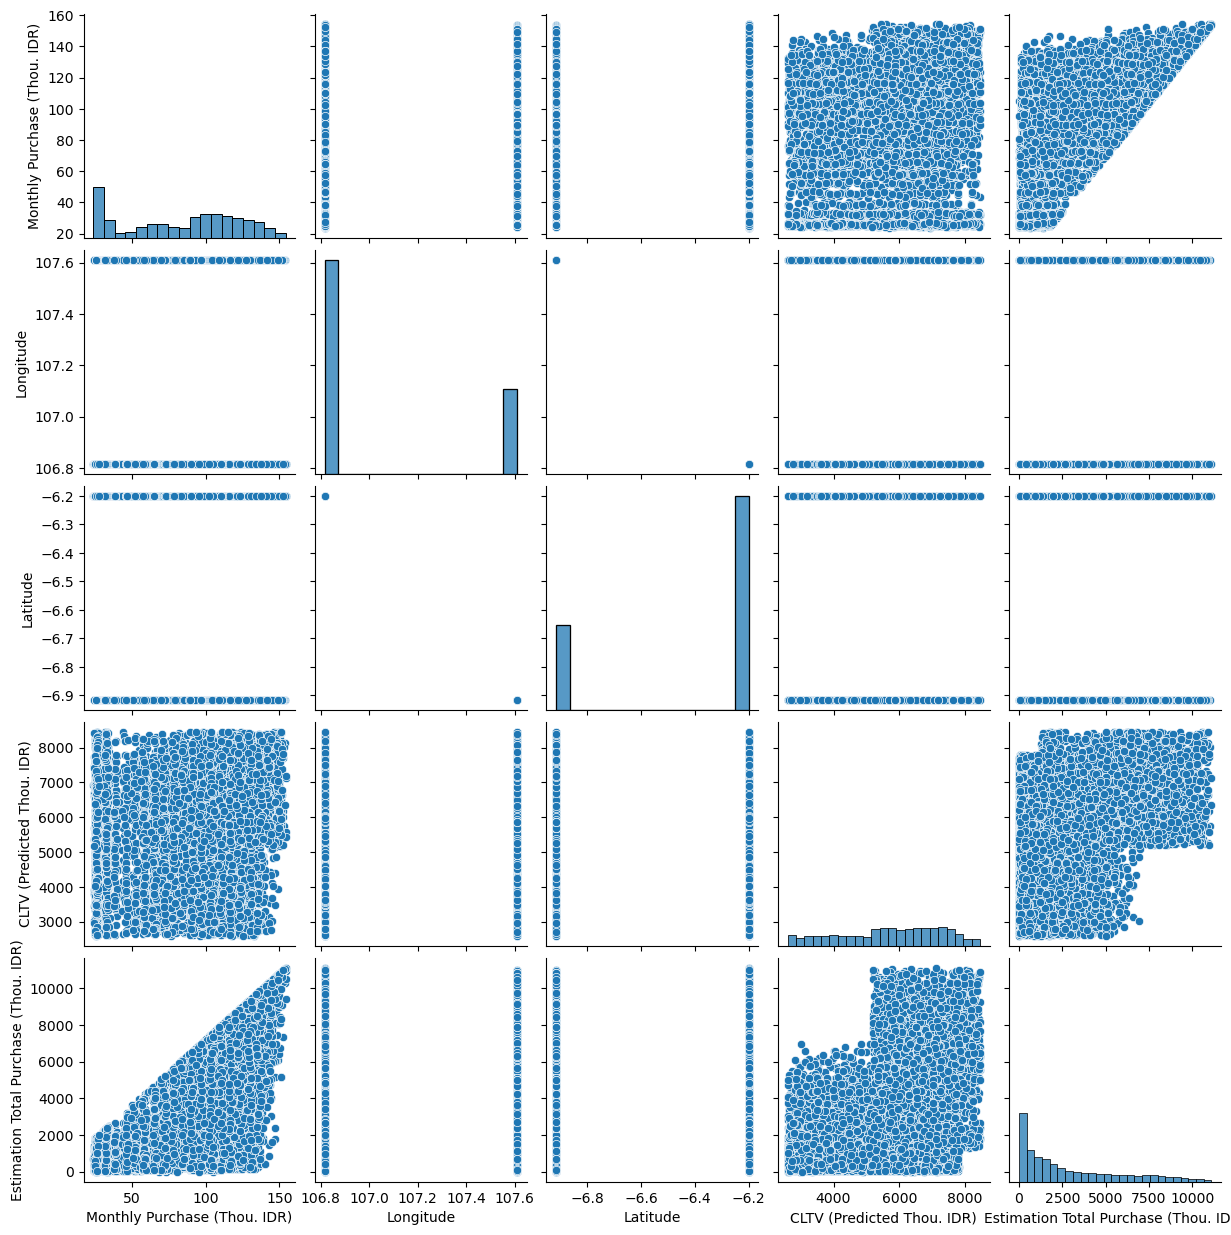

In [107]:
plt.figure()
sns.pairplot(telco_df)
plt.show()

In [108]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Location                               7043 non-null   object  
 1   Device Class                           7043 non-null   object  
 2   Games Product                          7043 non-null   object  
 3   Music Product                          7043 non-null   object  
 4   Education Product                      7043 non-null   object  
 5   Call Center                            7043 non-null   object  
 6   Video Product                          7043 non-null   object  
 7   Use MyApp                              7043 non-null   object  
 8   Payment Method                         7043 non-null   object  
 9   Monthly Purchase (Thou. IDR)           7043 non-null   float64 
 10  Churn Label                            7043 non-null   objec

In [109]:
# Define a dictionary to map tenure_group values to numeric values
tenure_group_mapping = {
    "1 - 12": 1,
    "13 - 24": 2,
    "25 - 36": 3,
    "37 - 48": 4,
    "49 - 60": 5
}

# Iterate through the tenure_group column and map values using the dictionary
telco_df['Tenure Group'] = [tenure_group_mapping.get(group, 6) for group in telco_df['Tenure Group']]

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Columns to encode
# categorical_columns = ['Location', 'Device Class', 'Games Product','Music Product',
#                        'Education Product','Call Center','Video Product','Use MyApp',
#                        'Churn Label']

# columns_to_encode = ['Payment Method']

columns_to_convert = ['Churn Label', 'Games Product', 'Music Product', 'Education Product',
                     'Video Product', 'Use MyApp']

for item in columns_to_convert:
    telco_df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in telco_df[item]]

telco_df_dummies = pd.get_dummies(telco_df)

# # Use Label Encoding for categorical columns
# label_encoder = LabelEncoder()
# for col in categorical_columns:
#     telco_df[col] = label_encoder.fit_transform(telco_df[col])

In [111]:
telco_df_dummies

Games Product  Music Product  Education Product  Video Product  \
0                 1              1                  0              0   
1                 0              0                  0              0   
2                 0              0                  1              1   
3                 0              0                  1              1   
4                 0              1                  1              1   
...             ...            ...                ...            ...   
7038             -1             -1                 -1             -1   
7039              1              0                  1              1   
7040              0              1                  1              1   
7041              1              0                  0              0   
7042              1              0                  1              1   

      Use MyApp  Monthly Purchase (Thou. IDR)  Churn Label  Longitude  \
0             0                        70.005            1  106.81667   
1             0                        91.910            1  106.81667   
2             1                       129.545            1  106.81667   
3             1                       136.240            1  106.81667   
4             1                       134.810            1  106.81667   
...         ...                           ...          ...        ...   
7038         -1                        27.495            0  106.81667   
7039          1                       110.240            0  106.81667   
7040          1                       134.160            0  106.81667   
7041          0                        38.480            0  106.81667   
7042          1                       137.345            0  106.81667   

      Latitude  CLTV (Predicted Thou. IDR)  ...  Location_Jakarta  \
0         -6.2                      4210.7  ...                 1   
1         -6.2                      3511.3  ...                 1   
2         -6.2                      6983.6  ...                 1   
3         -6.2                      6503.9  ...                 1   
4         -6.2                      6942.0  ...                 1   
...        ...                         ...  ...               ...   
7038      -6.2                      6897.8  ...                 1   
7039      -6.2                      2782.0  ...                 1   
7040      -6.2                      7228.0  ...                 1   
7041      -6.2                      3630.9  ...                 1   
7042      -6.2                      6626.1  ...                 1   

      Device Class_High End  Device Class_Low End  Device Class_Mid End  \
0                         0                     0                     1   
1                         1                     0                     0   
2                         1                     0                     0   
3                         1                     0                     0   
4                         1                     0                     0   
...                     ...                   ...                   ...   
7038                      0                     1                     0   
7039                      0                     0                     1   
7040                      1                     0                     0   
7041                      0                     0                     1   
7042                      1                     0                     0   

      Call Center_No  Call Center_Yes  Payment Method_Credit  \
0                  1                0                      0   
1                  1                0                      0   
2                  1                0                      0   
3                  0                1                      0   
4                  1                0                      0   
...              ...              ...                    ...   
7038               1                0                      0   
7039               0  

In [112]:
telco_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Games Product                          7043 non-null   int64  
 1   Music Product                          7043 non-null   int64  
 2   Education Product                      7043 non-null   int64  
 3   Video Product                          7043 non-null   int64  
 4   Use MyApp                              7043 non-null   int64  
 5   Monthly Purchase (Thou. IDR)           7043 non-null   float64
 6   Churn Label                            7043 non-null   int64  
 7   Longitude                              7043 non-null   float64
 8   Latitude                               7043 non-null   float64
 9   CLTV (Predicted Thou. IDR)             7043 non-null   float64
 10  Estimation Total Purchase (Thou. IDR)  7043 non-null   float64
 11  Tenu

In [113]:
telco_df_dummies['Tenure Group'].value_counts()

1    2175
6    1418
2    1024
3     832
5     832
4     762
Name: Tenure Group, dtype: int64

<Axes: >

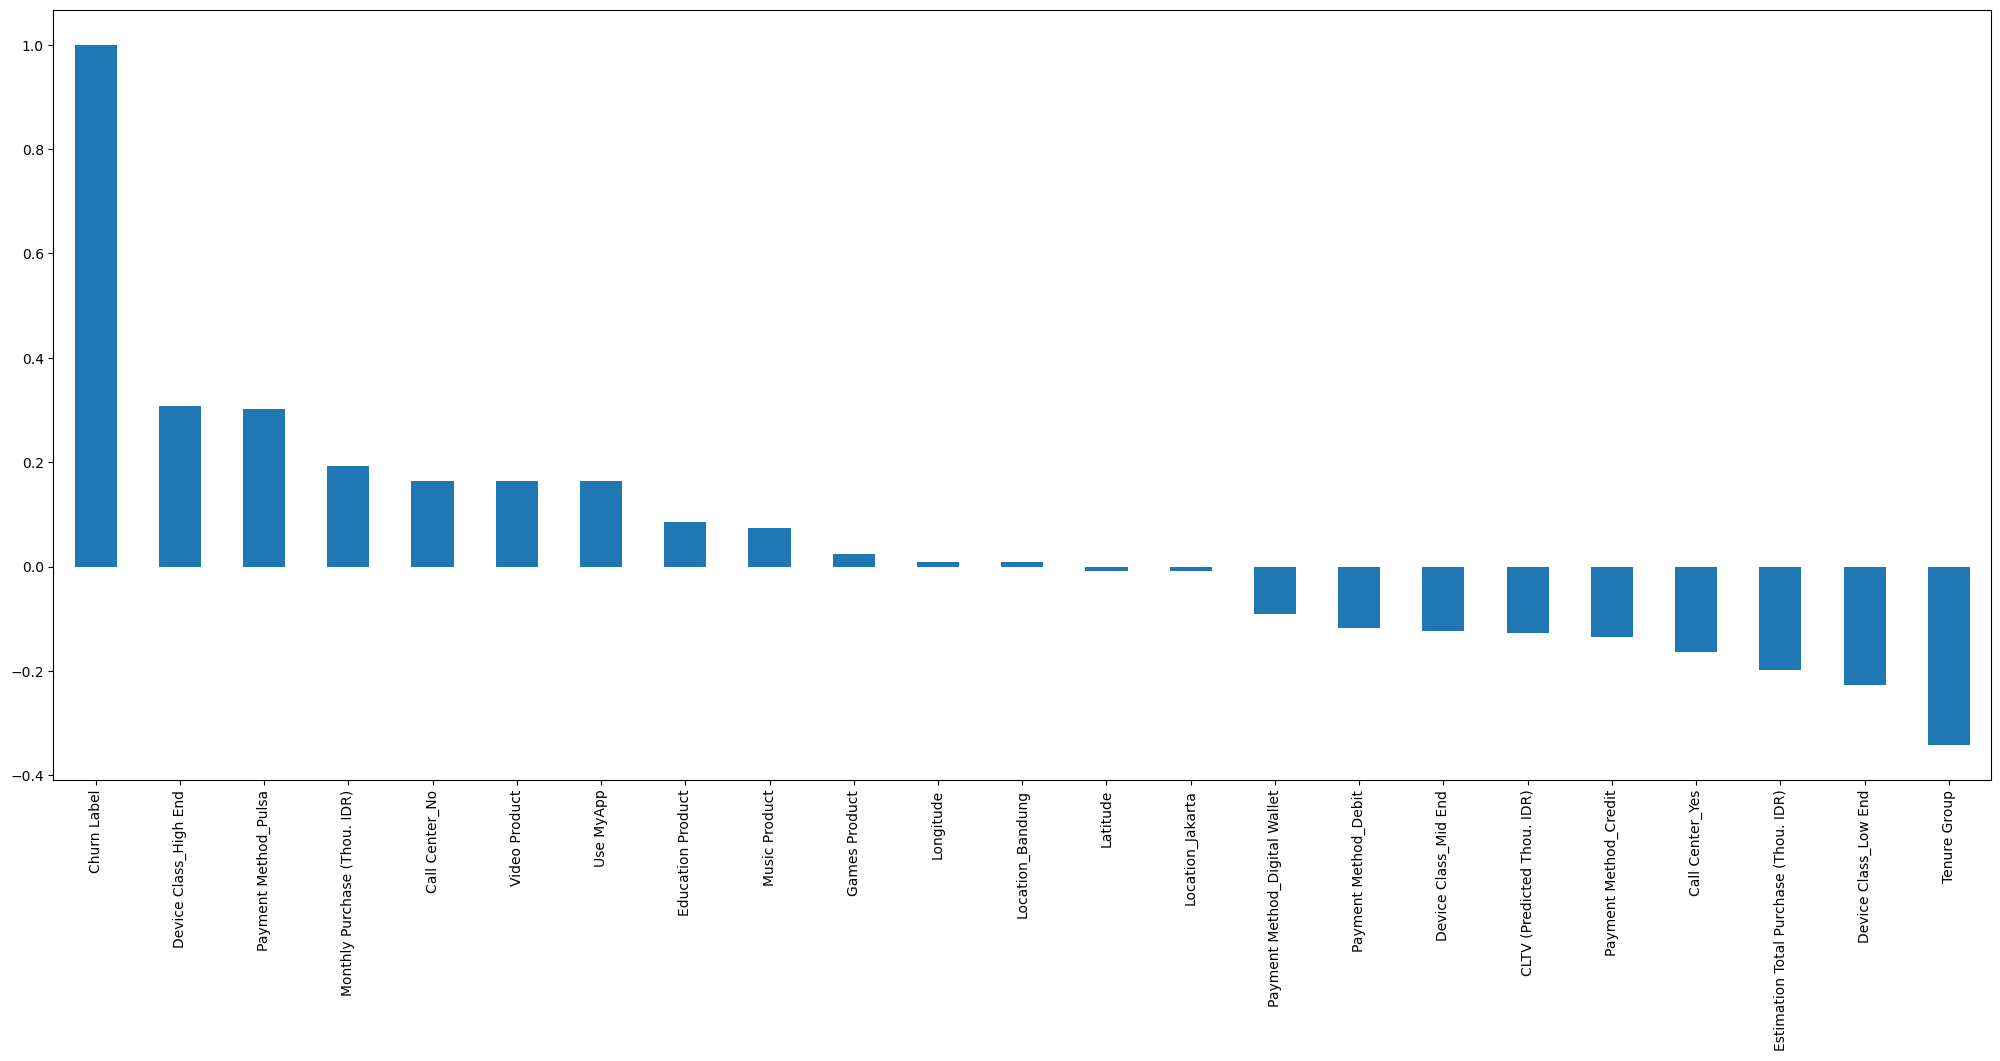

In [114]:
plt.figure (figsize = (25,10))
telco_df_dummies.corr()['Churn Label'].sort_values(ascending = False).plot(kind='bar')

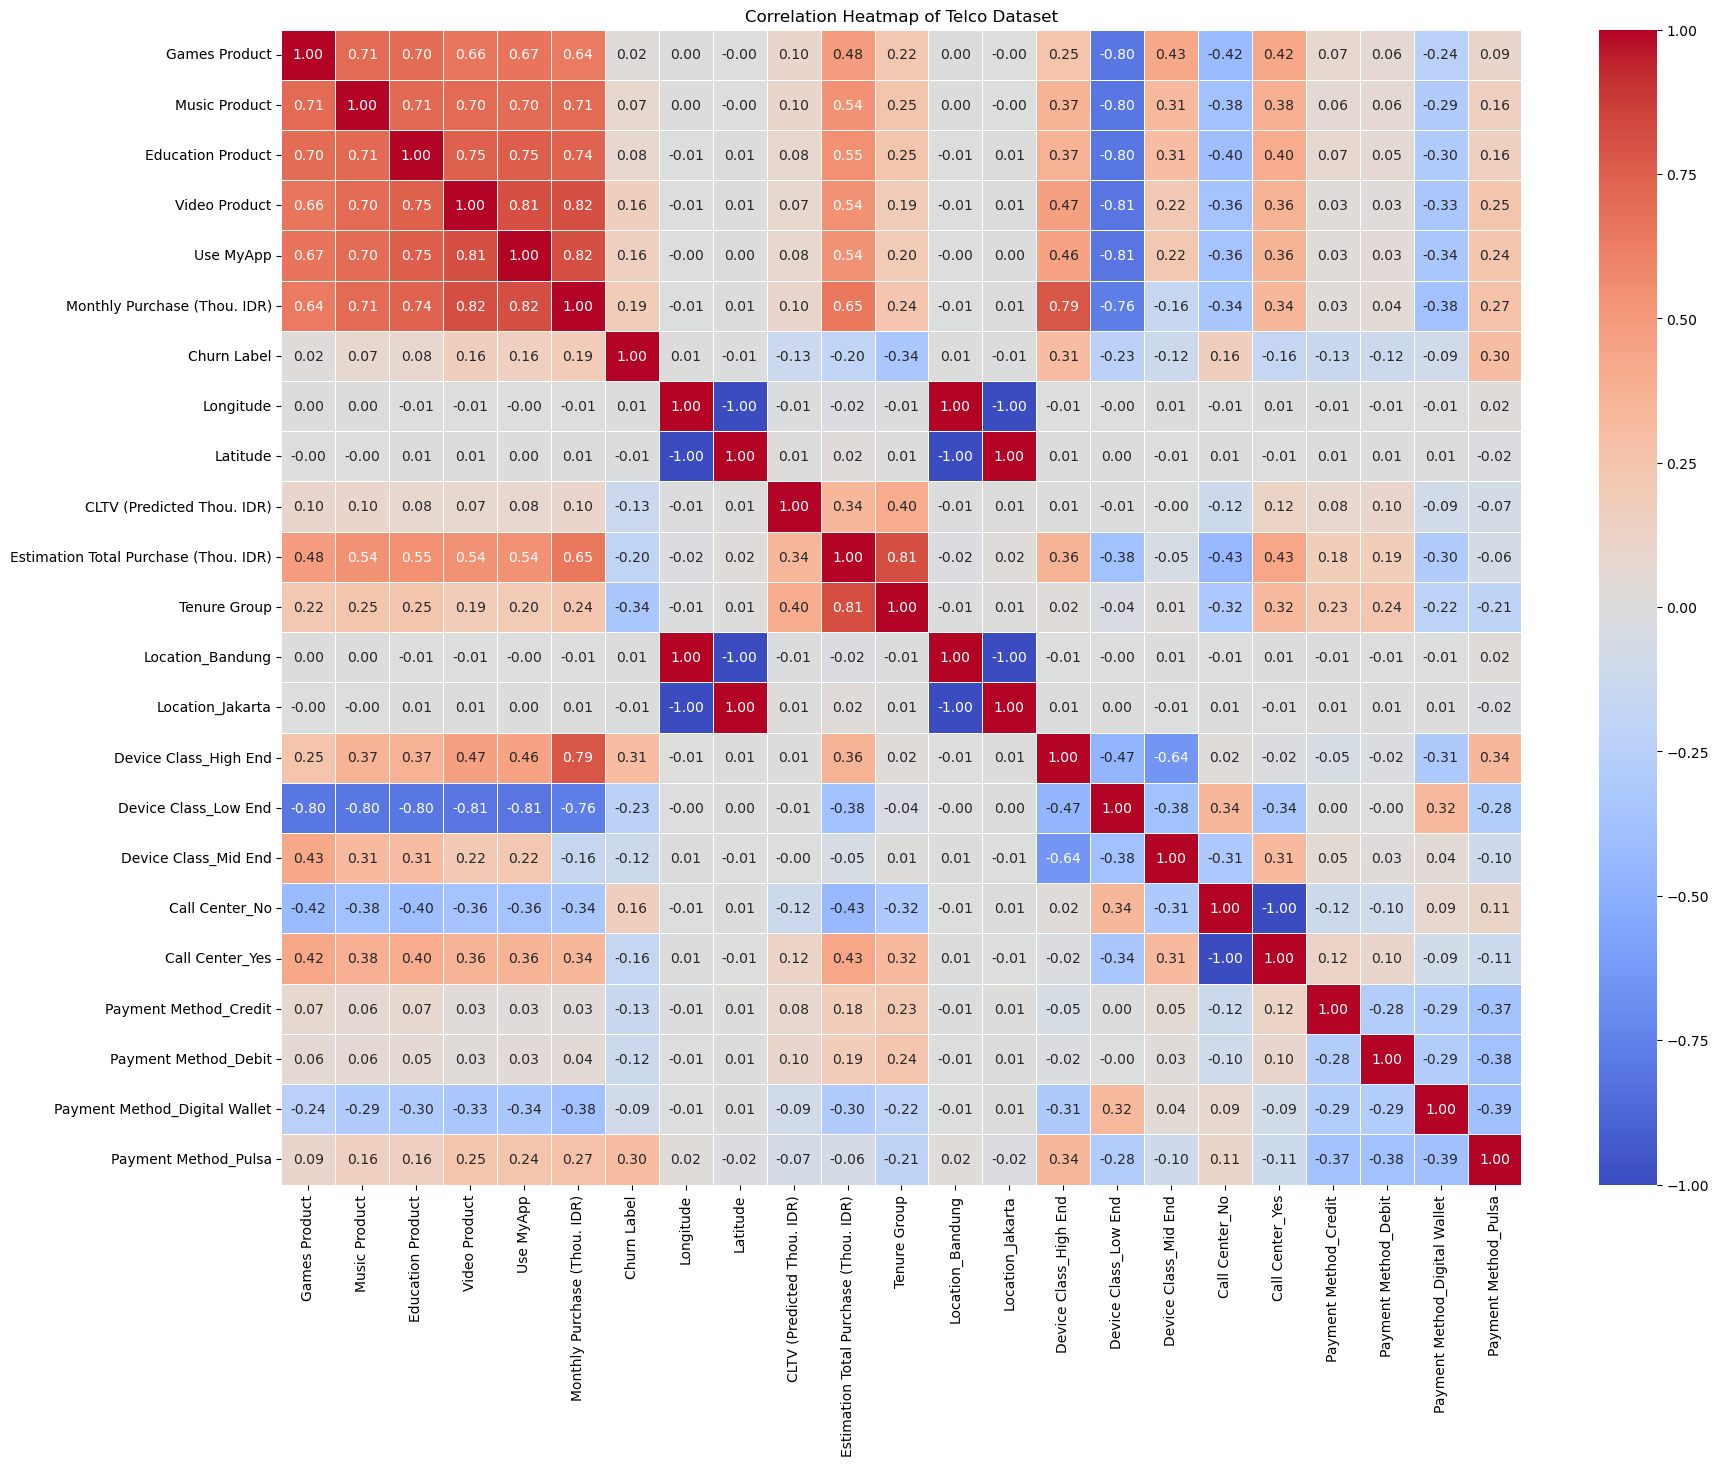

In [116]:
# Correlation matrix on one-hot encoded
data_to_correlate = telco_df_dummies.copy()

# Calculate the correlation matrix
correlation_matrix = data_to_correlate.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Telco Dataset")
plt.show()

In [117]:
## Set a correlation threshold (e.g., 0.7)
threshold = 0.7

# Create an empty DataFrame to store the highly correlated column pairs
highly_correlated_df = pd.DataFrame(columns=['Column1', 'Column2', 'Correlation'])

# Iterate through the correlation matrix and identify highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            highly_correlated_df = highly_correlated_df.append({'Column1': col_i, 'Column2': col_j, 'Correlation': corr_value}, ignore_index=True)

# Display the DataFrame with highly correlated column pairs
highly_correlated_df.sort_values(by=['Correlation'])

C:\Users\miran\AppData\Local\Temp\ipykernel_1348\633112833.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highly_correlated_df = highly_correlated_df.append({'Column1': col_i, 'Column2': col_j, 'Correlation': corr_value}, ignore_index=True)
C:\Users\miran\AppData\Local\Temp\ipykernel_1348\633112833.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highly_correlated_df = highly_correlated_df.append({'Column1': col_i, 'Column2': col_j, 'Correlation': corr_value}, ignore_index=True)
C:\Users\miran\AppData\Local\Temp\ipykernel_1348\633112833.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highly_correlated_df = highly_correlated_df.append({'Column1': col_i, 'Column2': col_j, 'Correlation': corr_value}, ignore_inde

Column1                                Column2  \
16              Location_Jakarta                              Longitude   
15              Location_Bandung                               Latitude   
12                      Latitude                              Longitude   
26               Call Center_Yes                         Call Center_No   
18              Location_Jakarta                       Location_Bandung   
24          Device Class_Low End                              Use MyApp   
23          Device Class_Low End                          Video Product   
21          Device Class_Low End                          Music Product   
22          Device Class_Low End                      Education Product   
20          Device Class_Low End                          Games Product   
25          Device Class_Low End           Monthly Purchase (Thou. IDR)   
5                      Use MyApp                          Music Product   
1              Education Product                          Games Product   
3                  Video Product                          Music Product   
0                  Music Product                          Games Product   
8   Monthly Purchase (Thou. IDR)                          Music Product   
2              Education Product                          Music Product   
9   Monthly Purchase (Thou. IDR)                      Education Product   
4                  Video Product                      Education Product   
6                      Use MyApp                      Education Product   
19         Device Class_High End           Monthly Purchase (Thou. IDR)   
7                      Use MyApp                          Video Product   
13                  Tenure Group  Estimation Total Purchase (Thou. IDR)   
11  Monthly Purchase (Thou. IDR)                              Use MyApp   
10  Monthly Purchase (Thou. IDR)                          Video Product   
17              Location_Jakarta                               Latitude   
14              Location_Bandung                              Longitude   

    Correlation  
16    -1.000000  
15    -1.000000  
12    -1.000000  
26    -1.000000  
18    -1.000000  
24    -0.812158  
23    -0.811354  
21    -0.803663  
22    -0.803500  
20    -0.797084  
25    -0.763557  
5      0.700158  
1      0.701690  
3      0.703167  
0      0.705166  
8      0.710477  
2      0.711335  
9      0.737104  
4      0.748182  
6      0.752952  
19     0.787066  
7      0.807221  
13     0.813260  
11     0.817842  
10     0.820225  
17     1.000000  
14     1.000000

Dari tabel korelasi dapat kita simpulkan bahwa yang No Internet Service dikarenakan oleh jenis device yang Low-End, sehingga tidak memiliki jaringan internet. Dengan tidak adanya jaringan internet ini, maka monthly purchase mereka juga tidak sebanyak customer dengan device High End.

In [118]:
telco_df.columns

Index(['Location', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
       'Payment Method', 'Monthly Purchase (Thou. IDR)', 'Churn Label',
       'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)',
       'Estimation Total Purchase (Thou. IDR)', 'Tenure Group'],
      dtype='object')

C:\Users\miran\anaconda3\envs\bismillah\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


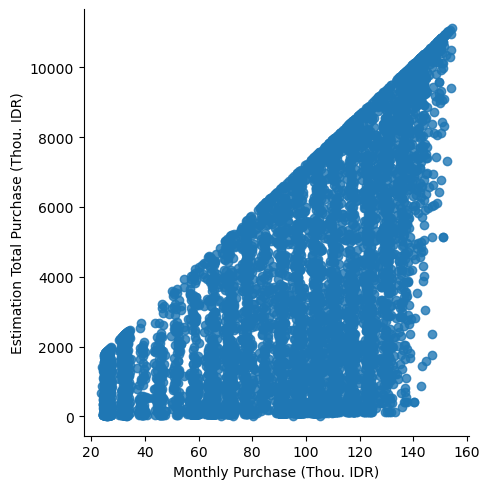

In [119]:
sns.lmplot(data=telco_df, x='Monthly Purchase (Thou. IDR)', y='Estimation Total Purchase (Thou. IDR)', fit_reg=False)

Dari grafik di atas, dapat kita simpulkan bahwa semakin mahal pembelian customer per bulannya, maka secara keseluruhan mereka memiliki total pembelian yang semakin mahal.

C:\Users\miran\AppData\Local\Temp\ipykernel_1348\2661270948.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_df['Monthly Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 0) ],
C:\Users\miran\AppData\Local\Temp\ipykernel_1348\2661270948.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_df['Monthly Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 1) ],


Text(0.5, 1.0, 'Monthly Purchases by Churn')

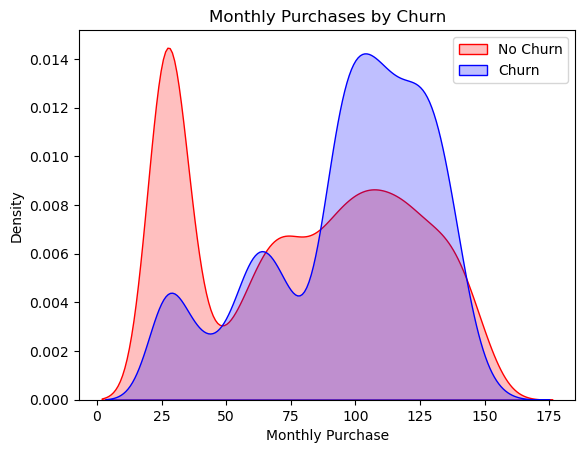

In [120]:
Mth = sns.kdeplot(telco_df['Monthly Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_df['Monthly Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Purchase')
Mth.set_title('Monthly Purchases by Churn')

Dari grafik di atas, kita melihat bahwa semakin murah biaya layanannya, maka probabilitas customer tetap aktif (non-churn) lebih besar. Sedangkan ketika customer membeli layanan yang seharga 50.000-an ke atas, lebih tinggi churn-nya dibanding non-churn.

C:\Users\miran\AppData\Local\Temp\ipykernel_1348\3283123489.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_df['Estimation Total Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 1) ],
C:\Users\miran\AppData\Local\Temp\ipykernel_1348\3283123489.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_df['Estimation Total Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 0) ],


Text(0.5, 1.0, 'Total Purchase by Churn')

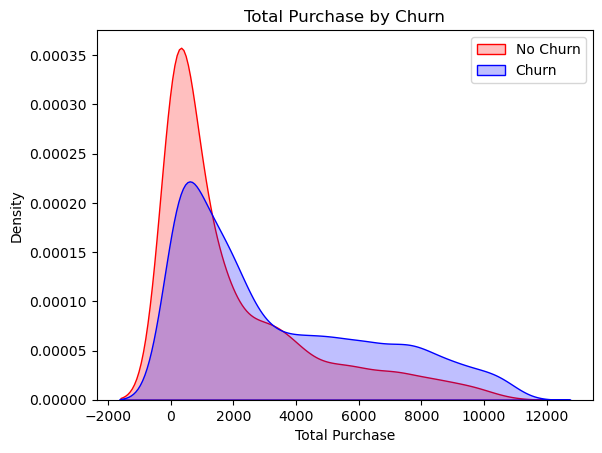

In [121]:
Tot = sns.kdeplot(telco_df['Estimation Total Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 1) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_df['Estimation Total Purchase (Thou. IDR)'][(telco_df["Churn Label"] == 0) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Purchase')
Tot.set_title('Total Purchase by Churn')

Churn dan non-churn padat kiri, sehingga semakin kecil total pembelian customer, kemungkinan untuk churn yang lebih tinggi.

C:\Users\miran\AppData\Local\Temp\ipykernel_1348\282624879.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_df['Tenure Group'][(telco_df["Churn Label"] == 0) ],
C:\Users\miran\AppData\Local\Temp\ipykernel_1348\282624879.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_df['Tenure Group'][(telco_df["Churn Label"] == 1) ],


Text(0.5, 1.0, 'Tenure Group by Churn')

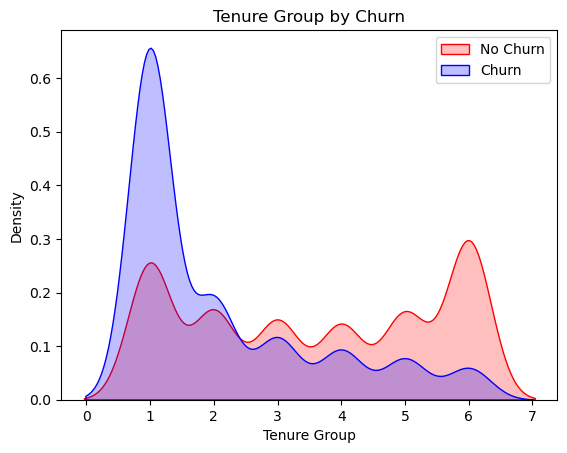

In [122]:
Tot = sns.kdeplot(telco_df['Tenure Group'][(telco_df["Churn Label"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_df['Tenure Group'][(telco_df["Churn Label"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn", "Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure Group')
Tot.set_title('Tenure Group by Churn')

Semakin singkat customer menggunakan layanan telekomunikasi perusahaan, semakin tinggi risiko customer menjadi churn. Sebaliknya, semakin lama customer (3 tahun ke atas) menggunakan layanan telekomunikasi perusahaan, semakin tinggi kesempatan si customer menjadi non-churn.

Dari ketiga grafik, kami dapat menarik kesimpulan bahwa, jika customer baru menggunakan layanan komunikasi kami dalam rentang 0 - 24 bulan, memiliki total purchase yang sedikit, namun membayar mahal untuk layanan tersebut, maka risiko untuk customer tersebut menjadi churn semakin tinggi.

## Sampling and Training The Data

In [123]:
telco_df

Location Device Class  Games Product  Music Product  Education Product  \
0     Jakarta      Mid End              1              1                  0   
1     Jakarta     High End              0              0                  0   
2     Jakarta     High End              0              0                  1   
3     Jakarta     High End              0              0                  1   
4     Jakarta     High End              0              1                  1   
...       ...          ...            ...            ...                ...   
7038  Jakarta      Low End             -1             -1                 -1   
7039  Jakarta      Mid End              1              0                  1   
7040  Jakarta     High End              0              1                  1   
7041  Jakarta      Mid End              1              0                  0   
7042  Jakarta     High End              1              0                  1   

     Call Center  Video Product  Use MyApp  Payment Method  \
0             No              0          0  Digital Wallet   
1             No              0          0           Pulsa   
2             No              1          1           Pulsa   
3            Yes              1          1           Pulsa   
4             No              1          1           Debit   
...          ...            ...        ...             ...   
7038          No             -1         -1           Debit   
7039         Yes              1          1  Digital Wallet   
7040          No              1          1          Credit   
7041          No              0          0           Pulsa   
7042         Yes              1          1           Debit   

      Monthly Purchase (Thou. IDR)  Churn Label  Longitude  Latitude  \
0                           70.005            1  106.81667      -6.2   
1                           91.910            1  106.81667      -6.2   
2                          129.545            1  106.81667      -6.2   
3                          136.240            1  106.81667      -6.2   
4                          134.810            1  106.81667      -6.2   
...                            ...          ...        ...       ...   
7038                        27.495            0  106.81667      -6.2   
7039                       110.240            0  106.81667      -6.2   
7040                       134.160            0  106.81667      -6.2   
7041                        38.480            0  106.81667      -6.2   
7042                       137.345            0  106.81667      -6.2   

      CLTV (Predicted Thou. IDR)  Estimation Total Purchase (Thou. IDR)  \
0                         4210.7                                 140.01   
1                         3511.3                                 183.82   
2                         6983.6                                1036.36   
3                         6503.9                                3814.72   
4                         6942.0                                6605.69   
...                          ...                                    ...   
7038                      6897.8                                1979.64   
7039                      2782.0                                2645.76   
7040                      7228.0                                9659.52   
7041                      3630.9                                 423.28   
7042                      6626.1                                9064.77   

      Tenure Group  
0                1  
1                1  
2                1  
3                3  
4                5  
...            ...  
7038             6  
7039             2  
7040             6  
7041             1  
7042             6  

[7043 rows x 16 columns]

In [124]:
telco_df.columns

Index(['Location', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
       'Payment Method', 'Monthly Purchase (Thou. IDR)', 'Churn Label',
       'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)',
       'Estimation Total Purchase (Thou. IDR)', 'Tenure Group'],
      dtype='object')

In [125]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

categorized_features = ['Location', 'Device Class', 'Games Product',
                        'Music Product', 'Education Product', 'Call Center',
                        'Video Product', 'Use MyApp', 'Payment Method', ]

encoder = LabelEncoder()
for item in categorized_features:
    telco_df[item] = encoder.fit_transform(telco_df[item])

In [126]:
telco_df.columns

Index(['Location', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
       'Payment Method', 'Monthly Purchase (Thou. IDR)', 'Churn Label',
       'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)',
       'Estimation Total Purchase (Thou. IDR)', 'Tenure Group'],
      dtype='object')

In [130]:
import numpy as np

countinous_features = ['Tenure Group', 'Monthly Purchase (Thou. IDR)', 'Estimation Total Purchase (Thou. IDR)']
all_features = np.concatenate([countinous_features, categorized_features])
telco_df_all_features = pd.get_dummies(telco_df[all_features], columns = ['Payment Method'])

In [131]:
for item in telco_df_all_features:
    print (item, ':', pd.unique(telco_df_all_features[item]))

Tenure Group : [1 3 5 4 2 6]
Monthly Purchase (Thou. IDR) : [ 70.005  91.91  129.545 ... 140.855  82.03  102.31 ]
Estimation Total Purchase (Thou. IDR) : [ 140.01  183.82 1036.36 ... 9659.52  423.28 9064.77]
Location : [1 0]
Device Class : [2 0 1]
Games Product : [2 1 0]
Music Product : [2 1 0]
Education Product : [1 2 0]
Call Center : [0 1]
Video Product : [1 2 0]
Use MyApp : [1 2 0]
Payment Method_0 : [0 1]
Payment Method_1 : [0 1]
Payment Method_2 : [1 0]
Payment Method_3 : [0 1]


In [132]:
scaler = StandardScaler()

X = scaler.fit_transform(telco_df_all_features)
X

array([[-1.13021023, -0.36266036, -0.95907066, ..., -0.5298852 ,
         1.83551265, -0.71102597],
       [-1.13021023,  0.19736523, -0.94418923, ..., -0.5298852 ,
        -0.54480692,  1.40641839],
       [-1.13021023,  1.1595457 , -0.65459766, ..., -0.5298852 ,
        -0.54480692,  1.40641839],
       ...,
       [ 1.45557156,  1.27753328,  2.27452527, ..., -0.5298852 ,
        -0.54480692, -0.71102597],
       [-1.13021023, -1.1686319 , -0.86284924, ..., -0.5298852 ,
        -0.54480692,  1.40641839],
       [ 1.45557156,  1.35896134,  2.07250004, ...,  1.88720123,
        -0.54480692, -0.71102597]])

C:\Users\miran\anaconda3\envs\bismillah\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miran\anaconda3\envs\bismillah\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miran\anaconda3\envs\bismillah\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miran\anaconda3\envs\bismillah\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

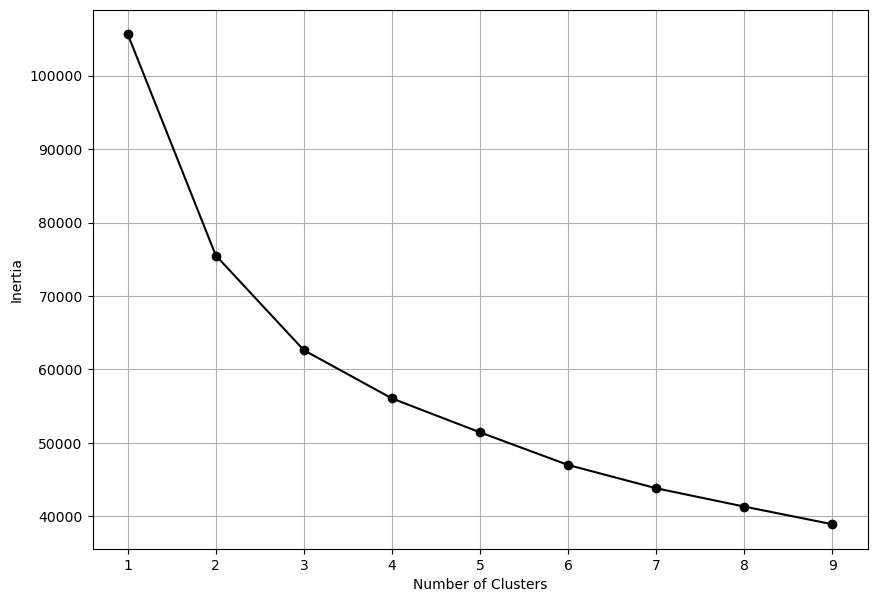

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2) K-Means Clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    
optimise_k_means(X, 10)

In [135]:
# Choose the number of clusters (you can experiment with different values)
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
telco_df_all_features['Cluster'] = kmeans.fit_predict(X)

C:\Users\miran\anaconda3\envs\bismillah\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [136]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-Means clustering
silhouette_avg = silhouette_score(X, telco_df_all_features['Cluster'])

# Print the silhouette score
print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")

Silhouette Score for 2 clusters: 0.2940996880304822


In [137]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # Load your dataset, assuming you have it in a DataFrame named 'data'
# # If you haven't already, you may need to preprocess the data and select relevant features

# # Specify the range of cluster numbers to try
# cluster_range = range(2, 5)
# silhouette_scores = []

# for num_clusters in cluster_range:
#     # Fit K-Means with the current number of clusters
#     kmeans = KMeans(n_clusters=num_clusters, random_state=0)
#     cluster_labels = kmeans.fit_predict(X)

#     # Calculate the silhouette score
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Plot the silhouette scores to visualize the results
# plt.plot(cluster_range, silhouette_scores, marker='o')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.show()

In [138]:
# # Drop non-numeric columns and columns with unique identifiers
# data = telco_df.drop(['Customer ID', 'Churn Label', 'Tenure Months'], axis=1).copy()
# # , 'Location', 'Device Class', 'Payment Method'

In [139]:
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# # One-Hot Encode some columns
# # Columns to encode
# categorical_columns = ['Location', 'Device Class', 'Games Product','Music Product',
#                        'Education Product','Call Center','Video Product','Use MyApp',
#                        'Payment Method']
# # data = pd.get_dummies(data, columns=columns_to_encode)

# # Use Label Encoding for categorical columns
# label_encoder = LabelEncoder()
# for col in categorical_columns:
#     data[col] = label_encoder.fit_transform(data[col])
    
# # Standardize the data
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)

In [140]:
# data

In [141]:
# data_scaled

## PCA

In [142]:
# from sklearn.decomposition import PCA

# # Create a PCA object with the desired number of components
# num_components = 5  # Choose the number of principal components you want
# pca = PCA(n_components=num_components)

# # Fit the PCA model to your data
# principal_components = pca.fit_transform(data_scaled)

In [143]:
# principal_components

In [144]:
# explained_variance = pca.explained_variance_ratio_
# print("Explained Variance Ratios:", explained_variance)

In [145]:
# # Calculate the explained variance for each principal component
# explained_variance = pca.explained_variance_

# # Create a Scree plot
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance')
# plt.grid()

# # Optionally, you can add a horizontal line to indicate a threshold (e.g., 95% variance explained)
# threshold = 0.95
# plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100:.2f}% Explained Variance')

# plt.legend()
# plt.show()

## K-Means with PCA

In [146]:
# # Choose the number of clusters (you can experiment with different values)
# num_clusters = 2

# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=0)
# data['Cluster'] = kmeans.fit_predict(principal_components)

In [147]:
# from sklearn.metrics import silhouette_score

# # Calculate the silhouette score for the K-Means clustering
# silhouette_avg = silhouette_score(principal_components, data['Cluster'])

# # Print the silhouette score
# print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")

## K-Means

In [148]:
# # Choose the number of clusters (you can experiment with different values)
# num_clusters = 10

# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=0)
# data['Cluster'] = kmeans.fit_predict(data_scaled)

In [149]:
# from sklearn.metrics import silhouette_score

# # Calculate the silhouette score for the K-Means clustering
# silhouette_avg = silhouette_score(data_scaled, data['Cluster'])

# # Print the silhouette score
# print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")

In [150]:
# data_scaled

In [151]:
# # Check for sum that are null
# data.isna().sum()

In [152]:
# # Count rows and columns
# col_row = telco_df.shape
# col_row_1 = data.shape
# print('Columns in telco_df: ', col_row[1], '\nRows in telco_df: ', col_row[0])
# print('Columns in data: ', col_row_1[1], '\nRows in telco_df: ', col_row_1[0])

## Cluster with K-Means

In [153]:
# # Determine the optimal number of clusters using the Elbow Method
# wcss = []
# for i in range(1, 10):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(data_scaled)
#     wcss.append(kmeans.inertia_)

# wcss

In [154]:
# # Plot the Elbow Method graph to choose the optimal number of clusters
# plt.plot(range(1, 10), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
# plt.show()

In [155]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # Load your dataset, assuming you have it in a DataFrame named 'data'
# # If you haven't already, you may need to preprocess the data and select relevant features

# # Specify the range of cluster numbers to try
# cluster_range = range(2, 7)
# silhouette_scores = []

# for num_clusters in cluster_range:
#     # Fit K-Means with the current number of clusters
#     kmeans = KMeans(n_clusters=num_clusters, random_state=0)
#     cluster_labels = kmeans.fit_predict(data_scaled)

#     # Calculate the silhouette score
#     silhouette_avg = silhouette_score(data_scaled, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Plot the silhouette scores to visualize the results
# plt.plot(cluster_range, silhouette_scores, marker='o')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.show()

In [156]:
# # Based on the Elbow Method, choose the optimal number of clusters (e.g., 3)
# optimal_clusters = 3

# # Apply K-Means clustering with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
# kmeans.fit(data_scaled)

# # Add the cluster labels to the original dataset
# data['Cluster'] = kmeans.labels_

# # Visualize the customer segments
# for cluster in range(optimal_clusters):
#     cluster_data = data[data['Cluster'] == cluster]
#     print(f"Cluster {cluster + 1}: {len(cluster_data)} customers")
#     print(cluster_data.mean())

# # You can further analyze and interpret the customer segments